In [39]:
import tensorflow as tf
import os
import zipfile
import numpy as np


DESIRED_ACCURACY = 0.999

"""!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"""

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()



In [18]:
happy_face_dir = os.path.join('/tmp/happy-or-sad/happy')
sad_face_dir = os.path.join('/tmp/happy-or-sad/sad')

In [20]:
happy_face = os.listdir(happy_face_dir)
print('# of Happy Face: ', len(happy_face))

sad_face = os.listdir(sad_face_dir)
print('# of Sad Face: ', len(sad_face))

# of Happy Face:  40
# of Sad Face:  40


In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

pic_index += 8
next_happy_pic = [os.path.join(happy_face_dir, fname)
                 for fname in happy_face[pic_index-8:pic_index]]
next_sad_pic = [os.path.join(sad_face_dir, fname)
               for fname in sad_face[pic_index-8:pic_index]]



bleh

['/tmp/happy-or-sad/happy/happy1-15.png', '/tmp/happy-or-sad/happy/happy2-09.png', '/tmp/happy-or-sad/happy/happy2-03.png', '/tmp/happy-or-sad/happy/happy1-17.png', '/tmp/happy-or-sad/happy/happy2-17.png', '/tmp/happy-or-sad/happy/happy2-12.png', '/tmp/happy-or-sad/happy/happy1-18.png', '/tmp/happy-or-sad/happy/happy2-11.png', '/tmp/happy-or-sad/sad/sad1-00.png', '/tmp/happy-or-sad/sad/sad1-18.png', '/tmp/happy-or-sad/sad/sad2-11.png', '/tmp/happy-or-sad/sad/sad1-10.png', '/tmp/happy-or-sad/sad/sad2-18.png', '/tmp/happy-or-sad/sad/sad1-06.png', '/tmp/happy-or-sad/sad/sad2-01.png', '/tmp/happy-or-sad/sad/sad1-04.png']
ddoing



<Figure size 1152x1152 with 0 Axes>

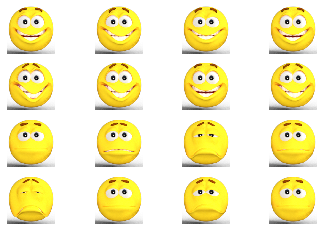

In [36]:
for i, img_path in enumerate(next_happy_pic+next_sad_pic):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [37]:
def train_happy_sad_model():
    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if( logs.get('acc') >= DESIRED_ACCURACY):
                self.model.stop_training = True

    callbacks = myCallback()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])
    
    model.summary()

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.0001),metrics=['acc'])
        
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale=1/255)

    train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s',
        target_size=(150,150),
        batch_size=10,
        class_mode='binary')

    history = model.fit_generator(
        train_generator,
        steps_per_epoch=7,
        epochs=100,
        verbose=1,
        callbacks=[callbacks])
 
    return history.history['acc'][-1]

In [38]:
train_happy_sad_model()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 18496)            

1.0